In [1]:
# Library Imports

import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from IPython import display
import requests
import io

In [2]:
def line(m, b, X): #defining line function
    return m * X + b

def nl_exp(l, b, X):
    return(np.exp(l*X+b))

def loss (m, b, X, Y) : #defining loss function
    return np.sum(np.square(Y-line(m,b,X)))

def loss_root (m, b, X, Y) : #defining loss function
    return np.sqrt(np.sum(np.square(Y-line(m,b,X))))

def nl_exp_loss (l, b, X, Y) : #defining loss function
    return np.sum(np.square(Y-nl_exp(l,b,X)))

def gradient (m, b, X, Y) : #defining gradient function
    dm = (-2) * np.sum(X * (Y - line(m,b,X)))
    db = (-2) * np.sum(Y - line(m,b,X))
    return (dm, db)



# Part1 Better gradient descent for optimization (40 points):
* * *
You are welcome to take inspiration from the class materials for this part. 
Create a notebook called gradient_descent.ipynb.
We want to make a better version of a 2D gradient descent algorithm with a few extra bells and whistles. 
Here’s the function definition.
* * *
```python
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True):
```

* * *
gradient should be a callable python object/function that will be called to update your model parameters X, Y are arrays that contain your data points initial is an array containing the starting values for the parameters of your model learning_rate and max_iter should be clear stop_tolerance is a value that checks in each iteration whether all gradient updates are smaller than this value, and if so, stops the gradient descent. 
If online_loss_plot is True, then the function should plot the full loss curve at each iteration (use a wait-time of 0.01s internally to not overload the plotting). 
Check the class notebook for an example or use your own way to do this in ipython notebooks.
The function needs to return the optimal parameters of your model in an array
* * *


In [3]:
# Part1 : Better gradient descent for optimization (40 points):

# 더 좋은 2D graient_descent를 만들거임.
import time
from IPython import display

def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True):
    errors = []
    [m, b] = initial
    
    x = np.linspace(min(X), max(X), 100)  # Adjusted x range for plotting

    for i in range(max_iter):
        # calculate the gradients
        dm, db = gradient(m, b, X, Y)
        if np.isnan(dm) or np.isnan(db):
            print("Gradient exploded at iteration", i)
            break


        # update the parameters with a little gradient
        m -= learning_rate*dm
        b -= learning_rate*db
        y = [m * x_i + b for x_i in x]  # Use updated m and b for plotting
        errors.append(loss(m, b, X, Y))
        
        if i > 0:
            if abs(errors[i-1] - errors[i]) < stop_tolerance:
                break
                
        if online_loss_plot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.scatter(X, Y, color='blue', alpha=0.6)  # plot data points
            plt.plot(x, y, color='red')  # plot line
            plt.grid()
            plt.title('Current iteration {}, Total loss = {:.2f}'.format(i+1, loss(m, b, X, Y)))
            time.sleep(0.01)
            plt.show()
    
    # plot the total loss over iterations
    if online_loss_plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.plot(errors, 'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
        time.sleep(0.01)
        plt.show()
    
    return [m, b]



# Part2 Fitting a line (40 points):
* * *
Add all code to the same gradient_descent.ipynb.
Add code to test the function with meaningful parameters to fit data from the WHO on how life expectancy may depend on GDP.
The data is taken from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who and is available via a shared Google Drive link, for which you will need to insert the
following code:
* * *
``` python
# method to download data from a shared, public link
!gdown 1ls8UVNIxToijFweUfhjkLsjS45z9-WP_
# load the data
data = np.genfromtxt('/content/Life Expectancy Data.csv',
delimiter=',')
print(data.shape)
# life expectancy
Y = data[1:, 3]
# GDP
X = data[1:, 16]
# we will focus on higher-income countries only!
ind = X>10000
Y = Y[ind]
X = X[ind]
```

* * *
Plot the data and resulting line together with the loss plot. Remember to include
proper x-axis and y-axis labels and in general to produce nice-looking plots! In order
to solve this, you obviously will need to define the gradient function properly and
pass it to gradient_descent!
Experiment with the learning_rate parameter such that the function fits the line
with a minimal number of iterations and add these to the notebook. You will need
to experiment a little to find out the minimal number of iterations!!
As you can see, we filtered the data to focus only on higher-income countries. If you
look at all data, what can you say about the dependency of life expectancy on GDP?
Insert your discussion into the notebook!
* * * 

In [4]:
# load the data
data = np.genfromtxt('content\Life Expectancy Data.csv', delimiter=',')

filtered_data = data[~np.isnan(data[:, 3]) & ~np.isnan(data[:, 16])]

# Extracting life expectancy and GDP columns
Y = filtered_data[:, 3]
X = filtered_data[:, 16]

# Filtering to focus on higher-income countries (GDP > 10,000)
ind = X > 10000
Y = Y[ind]
X = X[ind]


X = (X - np.mean(X)) / np.std(X)

# result : 
# (2939, 22)
# (445,)
# (445,)

# 1. 데이터랑 결과값 선이랑 Loss 선 Plot으로 그리기 (x축 y축도 넣어야됨) - 그러기 위해선 Part 1을 잘 작성해야된대

# 2. learning_rate 조절하면서 실험해서 최소의 iteration으로 optimal이되는 learning_rate 및 최소 iteration 찾아서 쓰래 

# 3. 저거 데이터가 GDP 높은 나라들만 잰건데 낮은 GDP도 포함되면 어떻게 될지 디스커션해서 쓰래



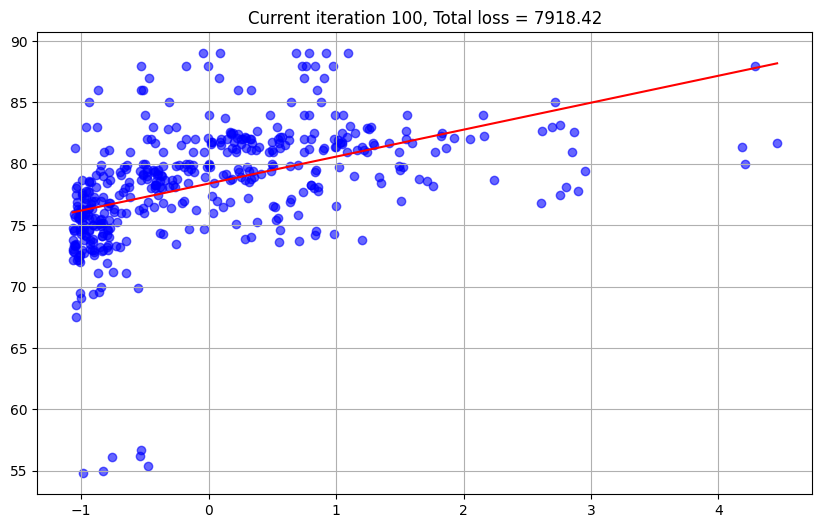

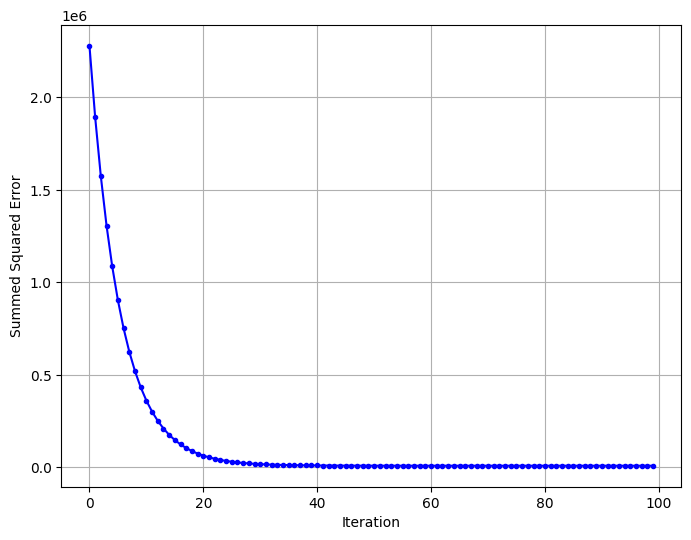

[2.195335447208841, 78.38916308030811]

In [5]:
learning_rate = 0.0001 #define learning_rate
initial=[0,0] # initialize weight and bias
gradient_descent(gradient, X, Y, initial, learning_rate, max_iter=100, stop_tolerance=1e-03, online_loss_plot=True) # Run the gradient descent function

# Discussion : 
* * *
We filtered the data to focus only on higher-income countries. If you look at all data, what can you say about the dependency of life expectancy on GDP?
* * *

# Part3 Exponential optimization (40 points):
* * *
Add all code to the same gradient_descent.ipynb.
Take the exponential data from the COVID outbreak and fit this in a smarter way by fitting everything in a logarithmic sense, so that exp(ax+b) becomes log(exp(ax+b)) = ax+b, which is simply a line.
So, if you take your data and transform it into logarithmic units, you can just call the usual least-squares line fit.
Add the code to do these transformations and plot the result for the COVID data. 
Do you get the same result as the “raw” exponential fit? 
Compare the fits of both types of optimizations using the loss plot and the resulting parameters.
Why can you take the logarithm of the loss function and optimize this instead?
Add an explanation to the notebook that tells me why that is possible.
* * *

(421, 17)


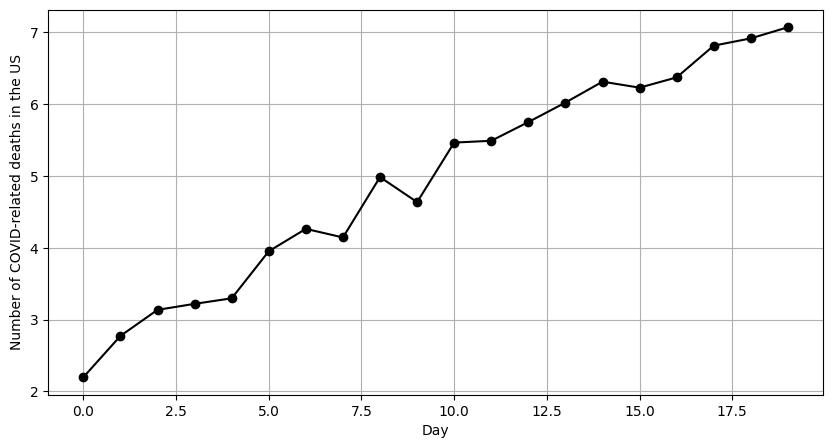

In [6]:
# Part3 Exponential optimization (40 points):

# load the data
response = requests.get('https://covidtracking.com/data/download/national-history.csv')
# not strictly necessary but good practice
response.raise_for_status()
# interpret results as BYTES, so that numpy can read from it!
data = np.genfromtxt(io.BytesIO(response.content),delimiter=',')
print(data.shape)

X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)
Y = np.log1p(Y) #applying log scale to data since data grows on exponential form and also we want to apply linear regression to original data

fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


# Your code here

# 1. exponential을 log로 transform 해주기


# 2. 기존거랑 같은 결과 나오는지 loss plot을 통해 확인하기
    # 결과는 
        # Smoothing and Compression: The logarithmic transformation compresses the range of the function. Large values are pulled closer together, and differences between small values are amplified. This compression can smooth out some of the steep regions of the function, leading to a more "gentle" landscape for optimization.

        # Steepness: The steepness of the function is directly related to the magnitude of its gradient. For functions with large values, taking the logarithm can significantly reduce the gradient's magnitude, leading to more stable and possibly faster convergence.

        # Learning Rate: If you're using the same learning rate for both the original and log-transformed functions, the log-transformed function may benefit more from that particular learning rate. Remember, the step size in gradient descent is proportional to the gradient magnitude. With the logarithmic transformation, the gradient magnitudes might be more suitable for the chosen learning rate.

        # Convexity: The logarithmic transformation can make some non-convex problems appear more convex. Gradient descent tends to work better and converge faster for convex problems.

        # Scale Invariance: Logarithmic transformation can provide a form of scale invariance. This means the function's shape remains similar across different scales, which can be beneficial for optimization.


# 3. log로 바꿔도 되는 이유 설명하기




In [7]:
def gradient_descent_COVID(gradient, X, Y, initial,learning_rate=0.001, max_iter=100, stop_tolerance=1e-03,online_loss_plot=True,ylim=10): 
    errors = np.zeros(max_iter)#Setting array of errors to be saved
    x = np.arange(0,20) #generating x element
    for i in range(max_iter):
        dm, db = gradient (initial[0], initial[1], X, Y) #differentiate loss function wit m and b
        initial[0] -= learning_rate*dm #update weight with learning rate*dm
        initial[1] -= learning_rate*db #update weight with learning rate*db
        y = [initial[0] * x_i + initial[1] for x_i in x] #update y value
        errors[i]=loss(initial[0], initial[1], X, Y) # loss
        if i>0:
            if abs(errors[i-1]-errors[i])<stop_tolerance: #if the difference between updated loss and prior loss is below stop_tolerance, which means iteration is meaningless so that we should stop iteration
                break
        if online_loss_plot: #drawing corresponding graph
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(0, 20)
            plt.ylim(0, ylim)
            plt.scatter(X,Y,c='b') #plot loss scatter
            plt.plot(x,y,c='k') #plot line
            plt.grid()
            plt.title('current iteration {}, total loss = {:.2f}'.format(i+1,loss(initial[0],initial[1],X,Y)))
            time.sleep(0.01)
            plt.show()
    if online_loss_plot:
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors[0:i],'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return initial

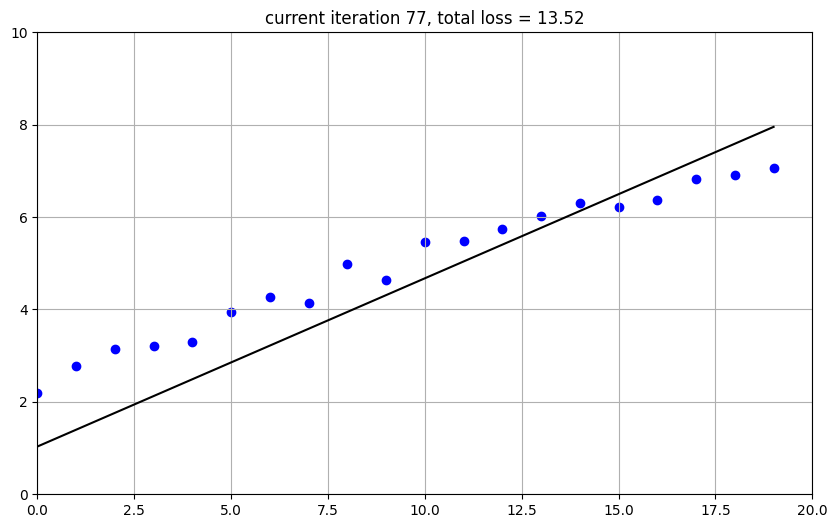

[0.3644304208966671, 1.0332285342250704]

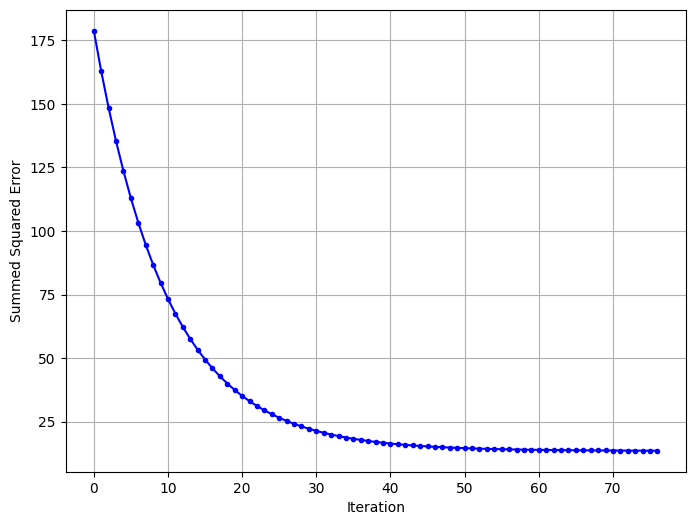

In [8]:
initial = [0.1, 1] # Set the initial weight (slope) and bias (intercept)
learning_rate = 1e-5 # Set the learning rate

gradient_descent_COVID(gradient, X, Y, initial,learning_rate,stop_tolerance=1e-02,ylim=10) #update initial weight till the loss converges

### Without log transformation

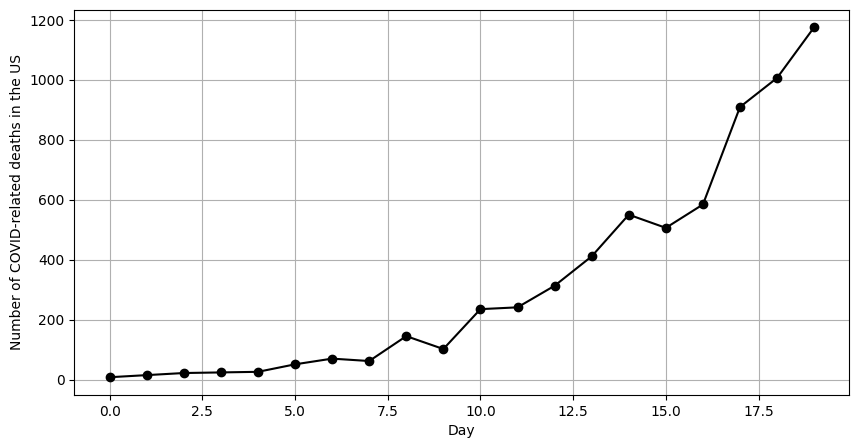

In [9]:
X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)

fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


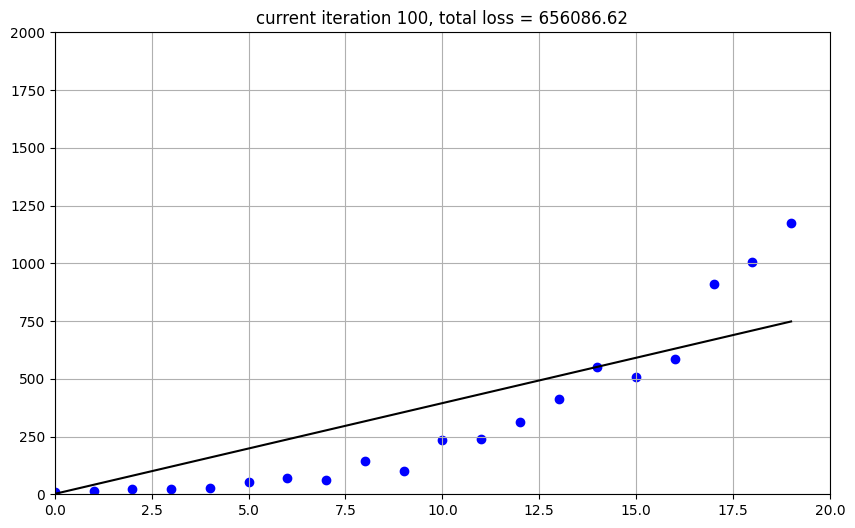

[39.27803479520233, 1.8151798904959284]

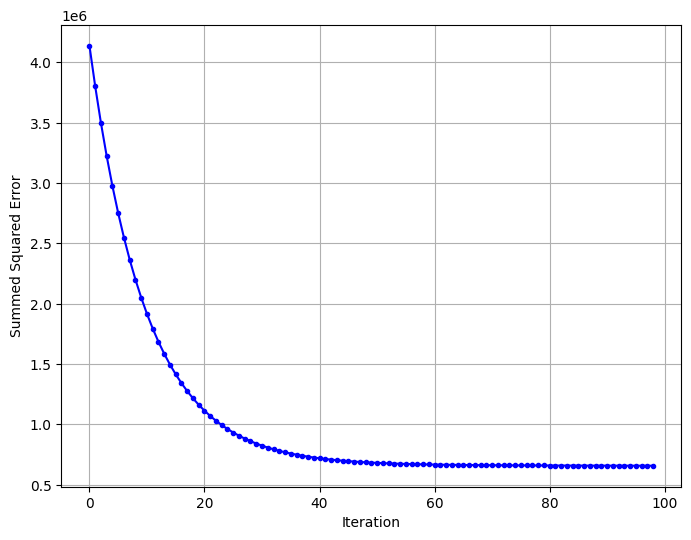

In [10]:
initial = [0.1, 1] # Set the initial weight (slope) and bias (intercept)
learning_rate = 1e-5 # Set the learning rate

gradient_descent_COVID(gradient, X, Y, initial,learning_rate,stop_tolerance=1e-02,ylim=2000) #update initial weight till the loss converges

### Discussion
Why can you take the logarithm of the loss function and optimize this instead?

# Bonus: online loss function plot (20 points):
* * *
Update the function with an additional parameter like so:
* * *
```python
def gradient_descent(gradient, X, Y, initial, learning_rate=0.001, max_iter=100, stop_tolerance=1e-06, online_loss_plot=False,online_surf_plot=False):
```
* * *
If online_surf_plot is True, then the function should also plot a surface plot of the loss surface together with all previous estimates at each iteration (use a wait-time of 0.01s internally to not overload the plotting). 
Check the class notebook for an example or use your own way to do this in ipython notebooks. 
The output should then look similar to this [without the Newton-Raphson plot].
* * *
In order to properly do this, you need to think about a “large” enough space of parameters to cover, so that the plot looks good enough - this is in general a non-trivial problem, as you do not know where the actual optimal point will go in
advance. 
Choose “meaningful” parameters for the student data and add the results to the notebook.
* * *


In [11]:
# Bonus: online loss function plot (20 points):



# 위에 로드한 학생 데이터를 가지고 
# online_surf_plot = True 면 곡면이 나오게 하래
# 그 plot 위에 iteration 마다 점/선이 찍히게 하고
# wait-time 0.01s로 해야 렉 안걸린대
# 결과물은 과제 페이지 에 나온거랑 비슷하게 나오면 됨

# 이를 하기 위해선 충분히 큰 parameter space를 고려해야됨 (걍 눈에 보이는 그래프가 좋게 나오게 하면 됨)
# 의미있는 학생 데이터를 골라서 결과물에 추가하라고 함

# 아래 코드는 파라메터가 추가된 gradient_descent 함수임

def gradient_descent_3d(gradient, X, Y, initial,learning_rate=0.001, max_iter=100, stop_tolerance=1e-02,online_loss_plot=True,online_surf_plot=True):
        
    xli=[initial[0]] #set initial weight
    yli=[initial[1]] #set initial bias
    zli=[loss(initial[0], initial[1], X, Y)] #loss corresponding to initial weight, bias, x and y
    
    errors = np.zeros(max_iter) #setting array of errors to be saved
    x = np.arange(25, 75) #generating x element
    for i in range(max_iter):
        dm, db = gradient (initial[0], initial[1], X, Y) #differentiate loss function with m and b
        initial[0] -= learning_rate*dm #update weight with learning rate * dm
        initial[1] -= learning_rate*db #update weight with learning rate * db
        y = [initial[0] * x_i + initial[1] for x_i in x] #update y value
        errors[i]=loss(initial[0], initial[1], X, Y) #calculate loss
        if i>0:
            if abs(errors[i-1]-errors[i])<stop_tolerance: #if the difference between updated loss and prior loss is below stop_tolerance, which means iteration is meaningless so that we should stop iteration
                break
        xli.append(initial[0]) #add weight to list
        yli.append(initial[1]) #add bias to list
        zli.append(errors[i])  #add error to list
        if online_loss_plot:#drawing graph
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(20, 80)
            plt.ylim(0, 140)
            plt.scatter(X,Y,c='b') #plot loss scatter
            plt.plot(x,y,c='k') #plot line
            plt.grid()
            plt.title('current iteration {}, total loss = {:.2f}'.format(i+1,loss(initial[0],initial[1],X,Y)))
            time.sleep(0.01) #wait time 0.01
            plt.show()
            
        if online_surf_plot:#plot 3d surface of full loss curve at each iteration
            ms = np.linspace(4,-4,30) #set range weight and bias
            bs = np.linspace(4,-4,30)
            
            [msm,bsm] = np.meshgrid(ms,bs)
    
            lossSurface = np.zeros((30,30)) 
            
            for i,m in enumerate(ms):
                for j,b in enumerate(bs):
                    lossSurface[j,i]=loss(m,b,X,Y) #calculate loss of all ms and bs
            
            fig = plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            ax = plt.axes(projection='3d')
            ax.plot_surface(msm, bsm, lossSurface,cmap='viridis', edgecolor='none',alpha=0.7) #plot range fo wight, bias and loss
            ax.scatter(xli,yli,zli,c='g') #plot learning weight and bias
            ax.plot(xli,yli,zli,c='red')
            ax.set_title('Surface plot')
            time.sleep(0.01)
            plt.show()
    if online_loss_plot | online_surf_plot: #plot the full loss curve at each iteration
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors[0:i],'b.-') #plot errors summary each iteration
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return initial


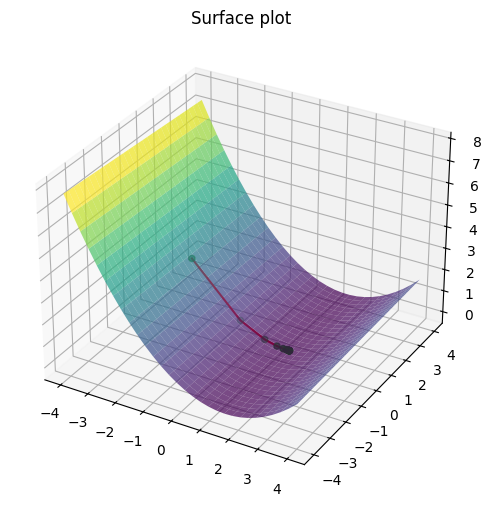

[1.4780737850219516, 0.0693175670671578]

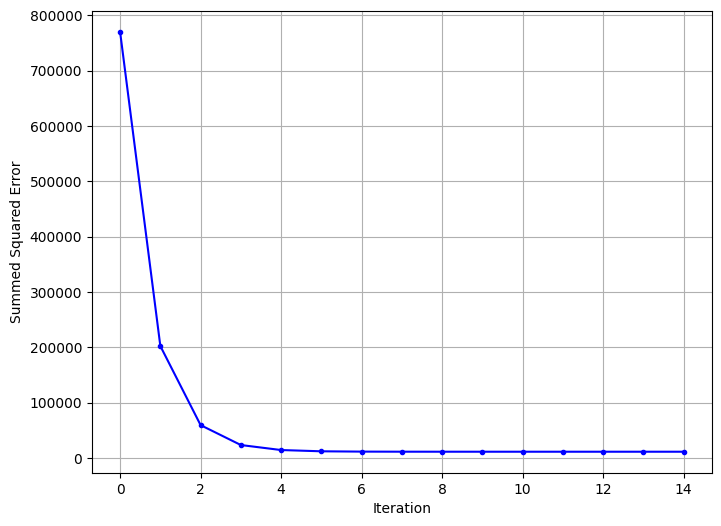

In [12]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')

X = data[:, 0]
Y = data[:, 1]
learning_rate = 0.000001 #define learning_rate
initial=[-2,0] #initialize weight and bias

gradient_descent_3d(gradient, X, Y, initial,learning_rate,online_loss_plot=False,online_surf_plot=True)